In [7]:
import csv

f = open("./subwayfee.csv")
data = csv.reader(f)

In [8]:
for row in data:
    print(row)

['사용월', '호선명', '역ID', '지하철역', '유임승차', '유임하차', '무임승차', '무임하차']
['2019-01', '1호선', '150', '서울역', '1516452', '1400464', '221180', '211764']
['2019-01', '1호선', '151', '시청', '676932', '676266', '102388', '101033']
['2019-01', '1호선', '152', '종각', '1240810', '1177643', '162410', '152062']
['2019-01', '1호선', '153', '종로3가', '703110', '674148', '387062', '362735']
['2019-01', '1호선', '154', '종로5가', '571824', '583955', '275447', '263687']
['2019-01', '1호선', '155', '동대문', '308301', '342898', '134071', '138633']
['2019-01', '1호선', '156', '신설동', '360561', '353834', '126466', '120147']
['2019-01', '1호선', '157', '제기동', '293540', '288217', '374571', '400607']
['2019-01', '1호선', '158', '청량리(서울시립대입구)', '463456', '482960', '352121', '357571']
['2019-01', '1호선', '159', '동묘앞', '174683', '188711', '146034', '147551']
['2019-01', '2호선', '201', '시청', '706097', '679503', '61058', '55387']
['2019-01', '2호선', '202', '을지로입구', '1415414', '1414980', '120425', '111592']
['2019-01', '2호선', '203', '을지로3가', '608979', '60

In [ ]:
import csv

f = open("./subwayfee.csv")
data = csv.reader(f)
next(data)

for row in data:
    for i in range(4,8):
        row[i] = int(row[i])
    print(row)

In [22]:
import csv

f = open("./subwayfee.csv")
data = csv.reader(f)
next(data)

mx = 0
rate = 0

for row in data:
    for i in range(4,8):
        row[i] = int(row[i])
    if row[4] != 0 and row[6] != 0:
        rate = row[4] / (row[4] +row[6]) 
    if mx < rate:
        mx = rate  
        mx_station = row[3] + ' ' + row[1]
        print(mx_station, round(mx * 100, 2))


서울역 1호선 87.27
종각 1호선 88.43
시청 2호선 92.04
을지로입구 2호선 92.16
한양대 2호선 93.83
강남 2호선 94.42
홍대입구 2호선 95.34
충무로 3호선 96.49


In [24]:
import csv

f = open("./subwayfee.csv")
data = csv.reader(f)
next(data)

mx = [0]*4 #최대 유임승차 유임하차 무임승차 무임하차 인원수
mx_station = [""]*4

label = ["유임승차", "유임하차", "무임승차", "무임하차"]


for row in data:
    for i in range(4,8):
        row[i] = int(row[i])
        if row[i] > mx[i-4]:
            mx[i-4] = row[i]
            mx_station[i-4] = row[3] + ' ' + row[1]

for i in range(4):
    print(label[i] + " : " +mx_station[i], mx[i])

유임승차 : 강남 2호선 3153418
유임하차 : 강남 2호선 3210437
무임승차 : 종로3가 1호선 387062
무임하차 : 제기동 1호선 400607


In [27]:
import csv

f = open("./subwayfee.csv")
data = csv.reader(f)
next(data)

mx = [9999999]*4 #최대 유임승차 유임하차 무임승차 무임하차 인원수
mx_station = [""]*4

label = ["유임승차", "유임하차", "무임승차", "무임하차"]


for row in data:
    for i in range(4,8):
        row[i] = int(row[i])
        if row[i] < mx[i-4] and row[i] != 0 and row[i] != 0:
            mx[i-4] = row[i]
            mx_station[i-4] = row[3] + ' ' + row[1]

for i in range(4):
    print(label[i] + " : " +mx_station[i], mx[i])

유임승차 : 지축 일산선 2
유임하차 : 지평 중앙선 566
무임승차 : 충무로 3호선 2
무임하차 : 옥수 경원선 91


In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 160772 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
import csv
import matplotlib.pyplot as plt

f = open("./subwayfee.csv")
data = csv.reader(f)
next(data)

mx = [0]*4 #최대 유임승차 유임하차 무임승차 무임하차 인원수
mx_station = [""]*4

label = ["유임승차", "유임하차", "무임승차", "무임하차"]


for row in data:
    for i in range(4,8):
        row[i] = int(row[i])
        plt.figure(dpi=200)
        plt.rc('font', family = 'NanumBarunGothic')
        plt.pie(row[4:8], labels = label, autopct="%.1f%%")
        plt.axis("equal")
        plt.savefig(row[3] + ' ' + row[1] + ".png")
        plt.title(f"{row[3]} {row[1]}")
        plt.show()

In [ ]:
import csv
f = open("subwaytime.csv")
data = csv.reader(f)
next(data)
next(data)

for row in data:
    row[4:] = map(int, row[4:])
    print(row)

In [11]:
import csv
f = open("subwaytime.csv")
data = csv.reader(f)
next(data)
next(data)

result = []

for row in data:
    row[4:] = map(int, row[4:])
    result.append(row[10])
print(len(result))
print(result)

598
[39110, 7703, 6733, 6066, 5143, 14893, 20077, 22615, 46015, 6088, 5822, 8459, 5822, 3225, 7973, 27835, 38199, 31012, 6313, 23263, 25458, 59821, 70814, 99368, 45639, 130638, 59461, 18787, 17974, 23502, 16391, 48487, 27365, 14946, 26301, 78413, 89675, 146181, 84974, 243083, 99608, 154641, 77272, 153133, 46364, 45277, 56578, 48068, 75744, 40444, 18646, 26197, 18343, 7965, 6917, 3353, 3160, 32301, 43628, 4860, 3988, 91650, 148741, 58325, 55607, 62354, 14773, 16297, 15231, 6464, 1992, 2337, 0, 5340, 25921, 27033, 24997, 17015, 13731, 16790, 28669, 8261, 27157, 36344, 15093, 8325, 25900, 3695, 25425, 21481, 38038, 22032, 23508, 26639, 49477, 101709, 59128, 108209, 141391, 127573, 54631, 92454, 88501, 52815, 33607, 17800, 5662, 7510, 10424, 5612, 6458, 12348, 18564, 5669, 11193, 13780, 4651, 49720, 78726, 3340, 6380, 12719, 21239, 19333, 31594, 42323, 9949, 24815, 39212, 15241, 47110, 44522, 37137, 89122, 28664, 89750, 19514, 28555, 71907, 42380, 77372, 43514, 16219, 48837, 9716, 9749, 21

598
[39110, 7703, 6733, 6066, 5143, 14893, 20077, 22615, 46015, 6088, 5822, 8459, 5822, 3225, 7973, 27835, 38199, 31012, 6313, 23263, 25458, 59821, 70814, 99368, 45639, 130638, 59461, 18787, 17974, 23502, 16391, 48487, 27365, 14946, 26301, 78413, 89675, 146181, 84974, 243083, 99608, 154641, 77272, 153133, 46364, 45277, 56578, 48068, 75744, 40444, 18646, 26197, 18343, 7965, 6917, 3353, 3160, 32301, 43628, 4860, 3988, 91650, 148741, 58325, 55607, 62354, 14773, 16297, 15231, 6464, 1992, 2337, 0, 5340, 25921, 27033, 24997, 17015, 13731, 16790, 28669, 8261, 27157, 36344, 15093, 8325, 25900, 3695, 25425, 21481, 38038, 22032, 23508, 26639, 49477, 101709, 59128, 108209, 141391, 127573, 54631, 92454, 88501, 52815, 33607, 17800, 5662, 7510, 10424, 5612, 6458, 12348, 18564, 5669, 11193, 13780, 4651, 49720, 78726, 3340, 6380, 12719, 21239, 19333, 31594, 42323, 9949, 24815, 39212, 15241, 47110, 44522, 37137, 89122, 28664, 89750, 19514, 28555, 71907, 42380, 77372, 43514, 16219, 48837, 9716, 9749, 21

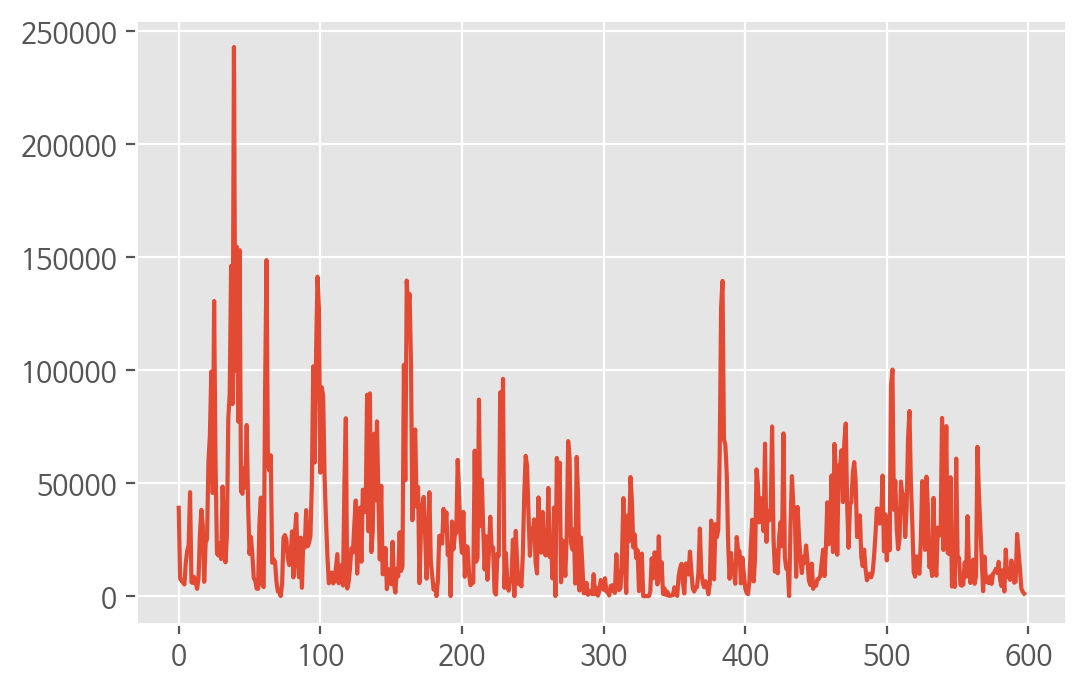

In [13]:
import csv
import matplotlib.pyplot as plt

f = open("subwaytime.csv")
data = csv.reader(f)
next(data)
next(data)

result = []

for row in data:
    row[4:] = map(int, row[4:])
    result.append(row[10])
print(len(result))
print(result)

plt.figure(dpi=200)
plt.style.use("ggplot")
plt.plot(range(len(result)), result)
plt.show()

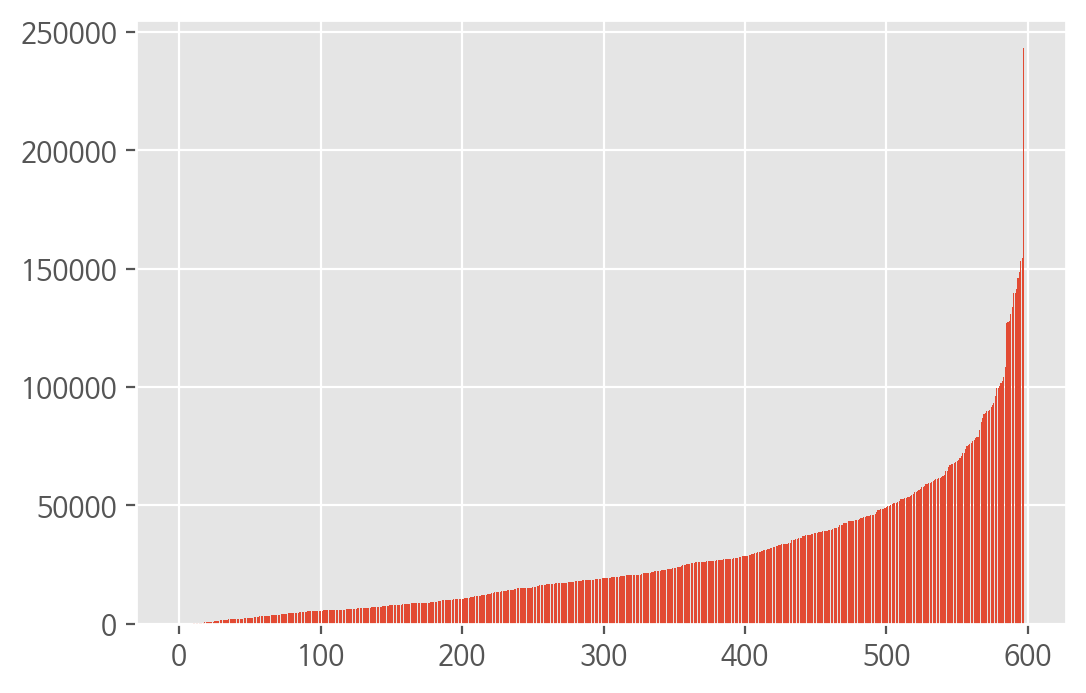

In [15]:
import csv
import matplotlib.pyplot as plt

f = open("subwaytime.csv")
data = csv.reader(f)
next(data)
next(data)

result = []

for row in data:
    row[4:] = map(int, row[4:])
    result.append(row[10])
result.sort()
plt.figure(dpi=200)
plt.style.use("ggplot")
plt.bar(range(len(result)), result)
plt.show()

In [ ]:
import csv
import matplotlib.pyplot as plt

f = open("subwaytime.csv")
data = csv.reader(f)
next(data)
next(data)

result = []

for row in data:
    row[4:] = map(int, row[4:])
    result.append(row[10:15:2])
print(len(result))
print(result)

plt.figure(dpi=200)
plt.style.use("ggplot")
plt.plot(range(len(result)), result)
plt.show()

In [16]:
import csv
import matplotlib.pyplot as plt

f = open("subwaytime.csv")
data = csv.reader(f)
next(data)
next(data)

mx = 0
mx_station = ""

for row in data:
    row[4:] = map(int, row[4:])
    if sum(row[10:15:2]) > mx:
        mx = sum(row[10:15:2])
        mx_station = f"{row[3]}({row[1]})"
print(mx_station, mx)    
'''
plt.figure(dpi=200)
plt.style.use("ggplot")
plt.plot(range(len(result)), result)
plt.show()
'''

신림(2호선) 809541


'\nplt.figure(dpi=200)\nplt.style.use("ggplot")\nplt.plot(range(len(result)), result)\nplt.show()\n'